In [1]:
import numpy as np
import ascfun as af
import matplotlib.pyplot as plt
def ftpam01(txt, Fb, Fs):
    """
    Function that accepts an ASCII text string as input and
    produces a corresponding binary unipolar flat-top PAM
    signal s(t) with bit rate Fb and sampling rate Fs.
    >>>>> tt, st = ftpam01(txt, Fb, Fs) <<<<<
    where tt: time axis for PAM signal s(t) (starting at -Tb/2)
        st: flat-top PAM signal s(t)
        s(t) = dn, (n-1/2)*Tb <= t < (n+1/2)*Tb
        txt: ASCII text string, 8 bits/symbol,
             converted to LSB-first bitstream dn
        Fb: bit rate of dn, Tb=1/Fb
        Fs: sampling rate of s(t)
    """
    bits = 8 # Bits per ASCII symbol
    # >> Convert txt to bitstream dn here, LSB-first <<
    dn = af.asc2bin(txt, bits = 8)
    N = len(dn) # Total number of bits
    Tb = 1/float(Fb) # Time per bit
    ixL = round(-0.5*Fs*Tb) # Left index for time axis
    ixR = round((N-0.5)*Fs*Tb) # Right index for time axis
    tt = np.arange(ixL, ixR)/float(Fs) # Time axis for s(t)
    # >> Generate flat-top PAM signal s(t) here <<
    st = np.sign(dn)
    return tt, st


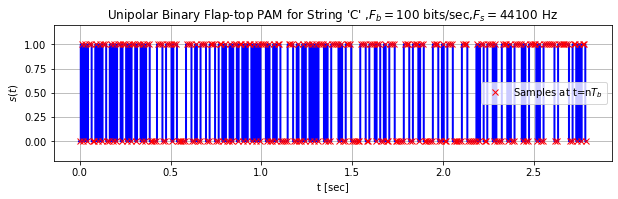

In [3]:
txt = 'jjjkk8789gikui8iuy987987898h..//??k'

Fb=100
Fs = 44100
tt, st = ftpam01(txt, Fb, Fs)
data = np.repeat(st, 2)
t = 0.5 * np.arange(len(data))/Fb
t1 = t - 0.005
fsz = (10,2.5)
plt.figure(1,figsize=fsz)
plt.step(t1, data, 'b', linewidth = 2, where = 'post')
plt.plot(t[::2], st ,"rx",label='Samples at t=n$T_b$')

plt.ylim(-0.2,1.2)
str = 'Unipolar Binary Flap-top PAM for String \'C\' '
str = str + ',$F_b={}$ bits/sec,$F_s={}$ Hz'.format(Fb,Fs)
plt.title(str)    
plt.ylabel('$s(t)$')
plt.xlabel('t [sec]')
plt.legend()   
plt.grid()
plt.show()

In [4]:
import wavfun as wf
wf.wavwrite('MyTest.wav',Fs,0.99*st/float(max(abs(st)))) # Write wav-file
wf.wavread('MyTest.wav')

(44100,
 array([0.        , 0.98998994, 0.        , 0.98998994, 0.        ,
        0.98998994, 0.98998994, 0.        , 0.        , 0.98998994,
        0.        , 0.98998994, 0.        , 0.98998994, 0.98998994,
        0.        , 0.        , 0.98998994, 0.        , 0.98998994,
        0.        , 0.98998994, 0.98998994, 0.        , 0.98998994,
        0.98998994, 0.        , 0.98998994, 0.        , 0.98998994,
        0.98998994, 0.        , 0.98998994, 0.98998994, 0.        ,
        0.98998994, 0.        , 0.98998994, 0.98998994, 0.        ,
        0.        , 0.        , 0.        , 0.98998994, 0.98998994,
        0.98998994, 0.        , 0.        , 0.98998994, 0.98998994,
        0.98998994, 0.        , 0.98998994, 0.98998994, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.98998994,
        0.98998994, 0.98998994, 0.        , 0.        , 0.98998994,
        0.        , 0.        , 0.98998994, 0.98998994, 0.98998994,
        0.        , 0.        , 0.989989

In [5]:
import numpy as np
def ftpam_rcvr01(tt, rt, Fbparms):
    """
    Binary unipolar Flat-top PAM sampling receiver for input signal
    r(t) with bitrate Fb and sampling rate Fs. The PAM signal rt
    with associated time axis tt (starting at -0.5*Tb) is sampled
    at times t = n*Tb + dly*Tb, where 0<=dly<1 is a delay parameter,
    to obtain a DT sequence rn.
    >>>>> rn, ixn = ftpam_rcvr01(tt, rt, Fbparms) <<<<<
    where rn: sampled DT sequence
        ixn: sampling time indexes
        tt: time axis for r(t)
        rt: received (noisy) PAM signal r(t)
        Fbparms: = [Fb, dly]
        Fb: Bit rate of PAM signal, Tb=1/Fb
        dly: sampling delay for r(t) -> r_n as a fraction of Tb
        sampling times are t=n*Tb+t0 where t0 = dly*Tb
    """
    if type(Fbparms)==int:
        Fb, dly = Fbparms, 0
    else:
        Fb, dly = Fbparms[0], 0
    if len(Fbparms) > 1:
        dly = Fbparms[1]
    Fs = (len(tt)-1)/(tt[-1]-tt[0]) # Extract sampling rate
    #>> Compute sampling indexes ixn and samples rn here <<
    n = len(rt)
    ixn =(n+dly)/float(Fb)
    rn  =  np.sign(rt)
    return rn, ixn

In [6]:
import numpy as np
import ascfun as af
import wavfun as wf
Fb = 100 # Data bit rate
Fs, rt = wf.wavread('MyTest.wav')
tt = np.arange(rt.size)/float(Fs)-1/(2.0*Fb) # Time axis for rt
Fbparms = [Fb, 0]
rn, ixn = ftpam_rcvr01(tt, rt, Fbparms)
dnhat =  np.floor(rn)
txthat =  af.bin2asc(dnhat, bits=8, flg=1) # >>Convert bitstream dnhat to received text string<<
print("The Final Result of PAM = %s" % txthat) # Print result

The Final Result of PAM = jjjkk8789gikui8iuy987987898h..//??k
